In this notebook, we will visualize the Pantheon+ Type Ia supernova data to determine options to employ Regression to predict the absolute magnitude of a type Ia supernova given the redshift (and some other features if possible).

We will begin by plotting the absolute magnitude (mB) against redshift (z).

D:\Random\Machine Learning Stuff\Projects\pantheonplus-regression\notebooks\../src\preprocessing.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path1, delim_whitespace=True)


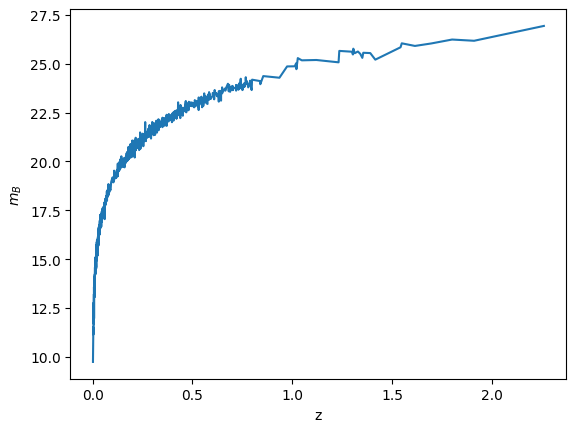

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append('../src')
from preprocessing import preprocessor_simple

pantheonpluspath = '../data/Pantheon+SH0ES.dat'

X1,Y1 = preprocessor_simple(pantheonpluspath)

plt.plot(X1['zHD'],Y1)
plt.xlabel('z')
plt.ylabel('$m_B$')
plt.show()


We can see that the apparent magnitude varies logarithmically with redshift. There are two options we could explore : 
1. Use a polynomial regressor to fit the data.
2. Consider only the linear part of the graph (~ z > 0.5) and use a linear regressor.

There is an obvious flaw with the second option as we can't predict apparent magnitudes of lower redshifts with a straight line fit. A polynomial regressor will probably give more accurate results.

Let's take a look at the linear portion of the graph.

Text(0, 0.5, '$m_B$')

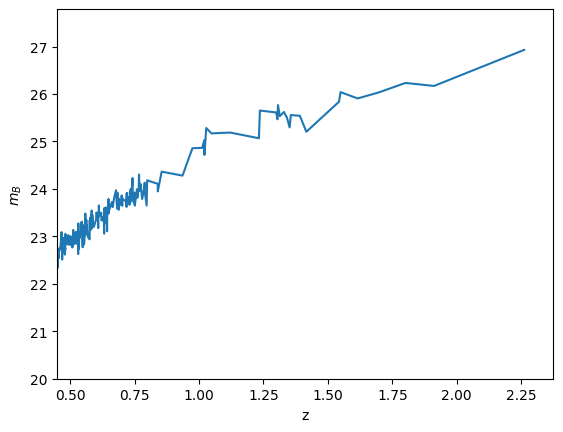

In [2]:
plt.plot(X1['zHD'],Y1)
plt.xlim(left = 0.45)
plt.ylim(bottom = 20)
plt.xlabel('z')
plt.ylabel('$m_B$')

2.775512403781775


D:\Random\Machine Learning Stuff\Projects\pantheonplus-regression\notebooks\../src\preprocessing.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(path1, delim_whitespace=True)


Text(0, 0.5, '$m_B$')

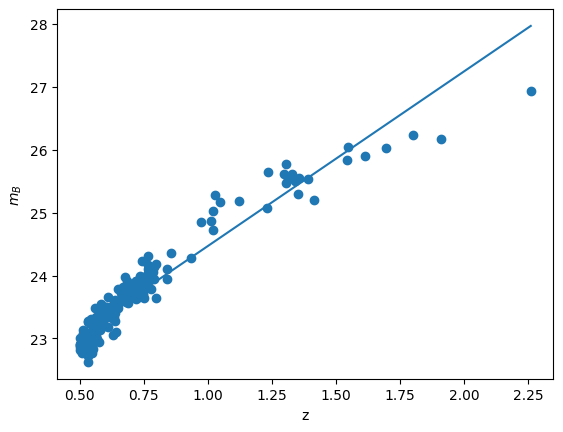

In [3]:
from regressors import linearregressor
X2,Y2 = preprocessor_simple(pantheonpluspath, 0.5)
x2 = X2['zHD'].values.reshape(-1,1)
y2 = Y2.values.reshape(-1,1)
# print(x2)
c,m = linearregressor(x2,y2,10000)
print(m)
yvals = lambda z: m*z + c

plt.plot(x2,yvals(x2))
plt.scatter(x2,y2)
plt.xlabel('z')
plt.ylabel('$m_B$')



We can see just from the plot that the fit is not that great. So we could try using a polynomial regressor. I will be using a simple 5th order polynomial regressor for this.

15.41988084156352 23.175887513374427 -12.692620945662108 -4.532771845590691 4.358754795829452 -0.5814993977331117


Text(0, 0.5, '$m_B$')

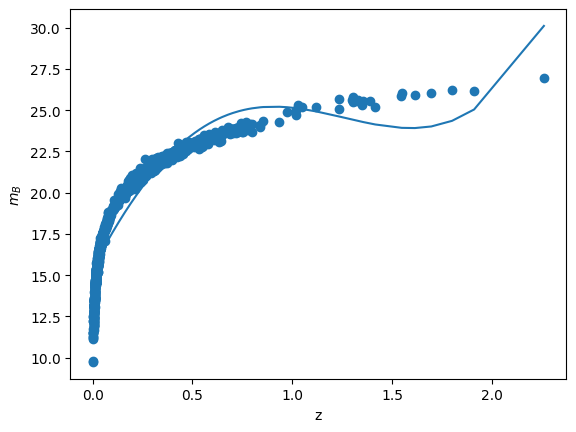

In [4]:
x1 = X1['zHD'].values.reshape(-1,1)
y1 = Y1.values.reshape(-1,1)
from regressors import thirdregressor
f, e,d,c,b,a = thirdregressor(x1,y1,100000, 0.01)
print(f,e,d,c,b,a)
yvals2 = lambda z: f+e*z+ d*(z**2) + c*(z**3) + b*(z**4) + a*(z**5)

plt.plot(x1,yvals2(x1))
plt.scatter(x1,y1)
plt.xlabel('z')
plt.ylabel('$m_B$')



Even though the fit is better this time, it still doesn't capture the featurs of the curve.

We will use more standard regressors like those provided by scikit-learn for this project, to get better predictions and to be able to use more features.